## TOPIC Identification of Mathematical word problems
Using GLoVe - Word Embeddings - Complete 100K Dataset 

### Load the DeepMind AQuA Data Set 

In [1]:
import pandas as pd
import numpy as np
import json 

In [2]:
qb =  pd.read_json('AQuA-master/train.json',lines=True)
qb.columns

Index(['correct', 'options', 'question', 'rationale'], dtype='object')

In [3]:
qb.head()

,correct,options,question,rationale
0,E,"[A)21, B)21.5, C)22, D)22.5, E)23]","Two friends plan to walk along a 43-km trail, ...","If Q complete x kilometers, then P completes 1..."
1,C,"[A)4 and 1, B)1 and 5, C)5 and 1, D)3 and 5, E...","In the coordinate plane, points (x, 1) and (5,...",Line k passes through the origin and has slope...
2,B,"[A)II, B)I and II, C)I and III, D)II and III, ...","For all numbers p and q, the operation @ is de...",p@q = p^2 - pq=p(p-q).... so p@q will be zero ...
3,A,"[A)$1600, B)$2000, C)$2150, D)$2500, E)$12000]",Carl is facing very difficult financial times ...,"Usually, you are given the annual rate of inte..."
4,E,"[A)18 seconds, B)27 seconds, C)26 seconds, D)1...",The speed at which a man can row a boat in sti...,Speed of the boat downstream = 25 +11\n= 36 km...


### Remove Named Entities 

In [4]:
import nltk
import string
def untokenize(tokens):
    return("".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip())

def extract_nonentities(tree):
    tokens = [leaf[0] for leaf in tree if type(leaf) != nltk.Tree]
    return(untokenize(tokens))

def ne_removal(text_list):
    token_list = [nltk.word_tokenize(text) for text in text_list]
    tagged = nltk.pos_tag_sents(token_list)
    chunked = nltk.ne_chunk_sents(tagged)
    non_entities = []
    for tree in chunked:
        non_entities.append(extract_nonentities(tree))
    return(non_entities)

In [5]:
# removal of named entities
qb['qn'] = (qb['question'])

### Pre process text  - convert to lower case , remove numeric , special characters

In [6]:
import re
qb.qn = qb.qn.apply(lambda x: x.lower())
qb['qn'] = qb['qn'].apply(lambda x: re.sub(r'\%', 'percent', x))
qb['qn'] = qb['qn'].apply(lambda x:re.sub("[^a-zA-Z]",' ',x))


### Split the question into word list for vectorization

In [7]:
qb['qn']=qb['qn'].apply(lambda x: x.split())
qb.head()

,correct,options,question,rationale,qn
0,E,"[A)21, B)21.5, C)22, D)22.5, E)23]","Two friends plan to walk along a 43-km trail, ...","If Q complete x kilometers, then P completes 1...","[two, friends, plan, to, walk, along, a, km, t..."
1,C,"[A)4 and 1, B)1 and 5, C)5 and 1, D)3 and 5, E...","In the coordinate plane, points (x, 1) and (5,...",Line k passes through the origin and has slope...,"[in, the, coordinate, plane, points, x, and, y..."
2,B,"[A)II, B)I and II, C)I and III, D)II and III, ...","For all numbers p and q, the operation @ is de...",p@q = p^2 - pq=p(p-q).... so p@q will be zero ...,"[for, all, numbers, p, and, q, the, operation,..."
3,A,"[A)$1600, B)$2000, C)$2150, D)$2500, E)$12000]",Carl is facing very difficult financial times ...,"Usually, you are given the annual rate of inte...","[carl, is, facing, very, difficult, financial,..."
4,E,"[A)18 seconds, B)27 seconds, C)26 seconds, D)1...",The speed at which a man can row a boat in sti...,Speed of the boat downstream = 25 +11\n= 36 km...,"[the, speed, at, which, a, man, can, row, a, b..."


### Tokenize all the word vectors

In [8]:
AllText = qb['qn'].values

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(AllText)
vocab_size = len(t.word_index) + 1
print(vocab_size)


Using TensorFlow backend.


14511


### Load the GloVe Word embeddings 

In [9]:
import io
embeddings_index = dict()
with io.open("./glove.6B/glove.6B.300d.txt", "r", encoding="utf-8") as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
#f.close()
print('Loaded %s word vectors from GloVe.' % len(embeddings_index))
      

Loaded 400000 word vectors from GloVe.


### Map Words in the Question dataset to the GloVe Embeddings

In [10]:
# create a weight matrix for words in training docs
vocab = []
embedding_matrix = np.zeros((vocab_size, 300))
err_count = 0
for word, i in t.word_index.items():
    vocab.append(word)
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else :
        print("Can't find Glove word vector for :{}".format(word))
        err_count +=1
vocab.append("-null")

Can't find Glove word vector for :tlaudia
Can't find Glove word vector for :trivandram
Can't find Glove word vector for :theintervals
Can't find Glove word vector for :shoestrips
Can't find Glove word vector for :aabbcc
Can't find Glove word vector for :boths
Can't find Glove word vector for :ifits
Can't find Glove word vector for :termmembers
Can't find Glove word vector for :thinnings
Can't find Glove word vector for :willbe
Can't find Glove word vector for :srujana
Can't find Glove word vector for :numbe
Can't find Glove word vector for :nigiet
Can't find Glove word vector for :manyworkersinhabit
Can't find Glove word vector for :repitation
Can't find Glove word vector for :shopa
Can't find Glove word vector for :samedistance
Can't find Glove word vector for :palindrom
Can't find Glove word vector for :vaisali
Can't find Glove word vector for :apack
Can't find Glove word vector for :somesh
Can't find Glove word vector for :staionary
Can't find Glove word vector for :exeeds
Can't fin

Can't find Glove word vector for :alongthe
Can't find Glove word vector for :tothat
Can't find Glove word vector for :icecreams
Can't find Glove word vector for :ofheads
Can't find Glove word vector for :probablity
Can't find Glove word vector for :mesmerise
Can't find Glove word vector for :pramit
Can't find Glove word vector for :xyq
Can't find Glove word vector for :hrsthe
Can't find Glove word vector for :abinaya
Can't find Glove word vector for :anchorge
Can't find Glove word vector for :divident
Can't find Glove word vector for :celco
Can't find Glove word vector for :celebria
Can't find Glove word vector for :wherec
Can't find Glove word vector for :beingpercent
Can't find Glove word vector for :nbesbt
Can't find Glove word vector for :andq
Can't find Glove word vector for :showingup
Can't find Glove word vector for :ashalf
Can't find Glove word vector for :mintu
Can't find Glove word vector for :fasterthan
Can't find Glove word vector for :certainno
Can't find Glove word vector

Can't find Glove word vector for :quarterof
Can't find Glove word vector for :mustthe
Can't find Glove word vector for :discout
Can't find Glove word vector for :oneof
Can't find Glove word vector for :whaat
Can't find Glove word vector for :agahus
Can't find Glove word vector for :thespherejust
Can't find Glove word vector for :carfor
Can't find Glove word vector for :ypercent
Can't find Glove word vector for :eachwager
Can't find Glove word vector for :twuenty
Can't find Glove word vector for :wieght
Can't find Glove word vector for :encosed
Can't find Glove word vector for :perfactly
Can't find Glove word vector for :wgq
Can't find Glove word vector for :aremainder
Can't find Glove word vector for :ayearly
Can't find Glove word vector for :nokias
Can't find Glove word vector for :pmfrom
Can't find Glove word vector for :sxity
Can't find Glove word vector for :ength
Can't find Glove word vector for :abcpqra
Can't find Glove word vector for :mixutre
Can't find Glove word vector for :o

In [11]:
print(embedding_matrix.shape)

(14511, 300)


### Function to calculate the average vector for the sentence 

In [12]:
import numpy as np
from scipy import spatial


def avg_feature_vector(wordlist,  nfeatures):
    feature_vec = np.zeros((nfeatures, ), dtype='float32')
    nwords = 0

    for word in wordlist:

        if word in vocab : # word is glove-vocab
            nwords += 1
            if (embeddings_index.get(word)) is not None:
                feature_vec = np.add(feature_vec, embeddings_index.get(word))
    if (nwords > 0):
        feature_vec = np.divide(feature_vec, nwords)
    return feature_vec

### For all the questions in Dataframe calculate the average feature vector

In [14]:
afv = []
for i in range(len(qb)) :
    fv = avg_feature_vector(qb['qn'][i], nfeatures=300)
    afv.append(fv)


In [15]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2,  algorithm='randomized', n_iter=10, random_state=42)
afv_2d = svd.fit_transform(afv)
print(afv_2d.shape)



(97467, 2)


### Clustering Using KMeans Cluster
* NLTK based KMeansClusterer not converging for this large dataset

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

km = KMeans(n_clusters=10,random_state=42,verbose=0)
clusters = km.fit_predict(afv)
 

In [17]:
qb['clusters'] = clusters

In [ ]:
#qb.to_csv("train_glove300_clusters.csv")

In [18]:
qset = { 'question': qb.question, 'cluster': clusters }
frame = pd.DataFrame(qset, columns = ['question','cluster'])

### Cluster Analysis

In [19]:
grouped = frame['question'].groupby(frame['cluster']) #groupby cluster for aggregation purposes

In [20]:
qb["x"] = afv_2d[:,0]
qb["y"] = afv_2d[:,1]

qb.head(10)

,correct,options,question,rationale,qn,clusters,x,y
0,E,"[A)21, B)21.5, C)22, D)22.5, E)23]","Two friends plan to walk along a 43-km trail, ...","If Q complete x kilometers, then P completes 1...","[two, friends, plan, to, walk, along, a, km, t...",2,3.085448,-0.000562
1,C,"[A)4 and 1, B)1 and 5, C)5 and 1, D)3 and 5, E...","In the coordinate plane, points (x, 1) and (5,...",Line k passes through the origin and has slope...,"[in, the, coordinate, plane, points, x, and, y...",1,2.997051,0.831158
2,B,"[A)II, B)I and II, C)I and III, D)II and III, ...","For all numbers p and q, the operation @ is de...",p@q = p^2 - pq=p(p-q).... so p@q will be zero ...,"[for, all, numbers, p, and, q, the, operation,...",4,2.584467,1.599173
3,A,"[A)$1600, B)$2000, C)$2150, D)$2500, E)$12000]",Carl is facing very difficult financial times ...,"Usually, you are given the annual rate of inte...","[carl, is, facing, very, difficult, financial,...",3,3.290567,-0.370104
4,E,"[A)18 seconds, B)27 seconds, C)26 seconds, D)1...",The speed at which a man can row a boat in sti...,Speed of the boat downstream = 25 +11\n= 36 km...,"[the, speed, at, which, a, man, can, row, a, b...",2,3.182475,-0.268323
5,A,"[A)8, B)9, C)10, D)11, E)12]","There are k-2 members in a certain band, inclu...","There are k-2 members in the band, and k-4 mem...","[there, are, k, members, in, a, certain, band,...",7,3.124343,0.017055
6,A,"[A)− 3 ≤ x ≤ 4, B)− 4 ≤ x ≤ 3, C)− 3 ≤ x ≤ 3, ...","If (x^2 + 4x - 11)/5 ≤ x + 1, then x could be ...",IMO A is correct answer\nsolving through eqaut...,"[if, x, x, x, then, x, could, be, represented,...",4,3.333456,1.748954
7,E,"[A)10101, B)11000, C)10110, D)10111, E)10100]",Find the smallest number of five digits exactl...,Smallest number of five digits is 10000.\nRequ...,"[find, the, smallest, number, of, five, digits...",9,2.875100,0.180713
8,B,"[A)16, B)20.5, C)17.5, D)20, E)4.5]",The entrance fee for a fair is $5 for persons ...,Total entrance fee is (2*$5) + (1.20*5)= $16\n...,"[the, entrance, fee, for, a, fair, is, for, pe...",7,3.288262,-0.375648
9,C,"[A)15, B)31, C)12, D)27, E)91]",If X and Y are digits and 8XY is a 3-digit num...,Key to this question is to remember the fact t...,"[if, x, and, y, are, digits, and, xy, is, a, d...",1,3.027379,0.930708


In [21]:
qb['clusters'].value_counts()

7    19058
9    17830
3    17441
2    12666
0    10725
1     9668
5     5513
4     2999
6     1205
8      362
Name: clusters, dtype: int64

In [22]:
a=qb['clusters'].unique()
b=qb['clusters'].value_counts()

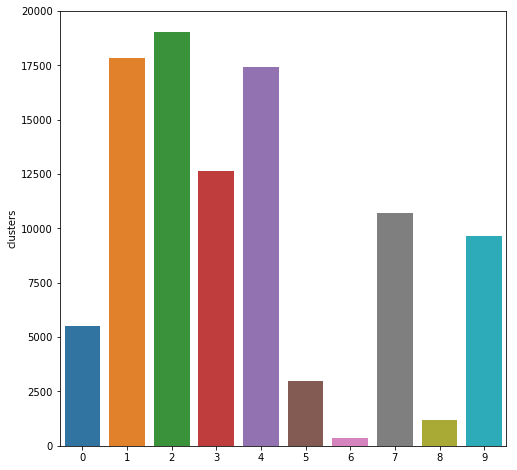

In [28]:
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.barplot(a,b,ax=ax)

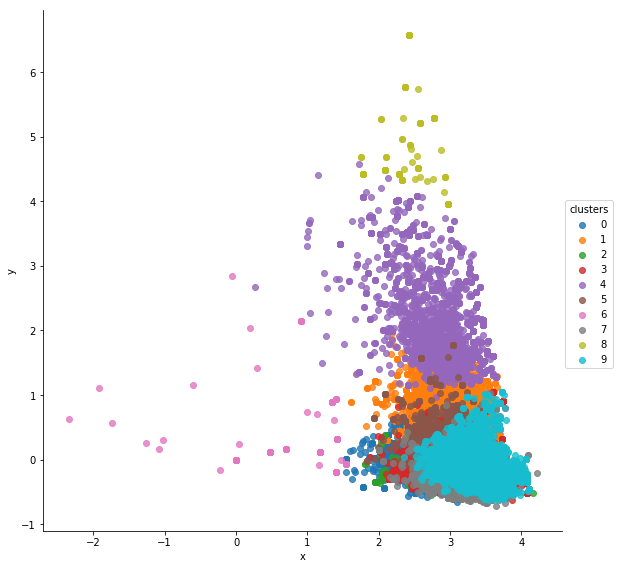

In [27]:
import seaborn as sns
%matplotlib inline

sns.lmplot( x="x", y="y", data=qb, fit_reg=False, hue='clusters',size=8, aspect=1);


### Cluster Analysis - Lets look at the questions in each cluster
* lets look at 20 questions from each cluster

In [29]:
grouped = frame['question'].groupby(frame['cluster']) #groupby cluster for aggregation purposes
for key, item in grouped:
    print('-'*80)
    print("Questions in Cluster ",key)
    print('-'*80)
    x = grouped.get_group(key)
    cnt=0
    for i in x:
        print("[",cnt,"]",i)
        cnt=cnt+1;
        if (cnt>20):
            break
        

--------------------------------------------------------------------------------
Questions in Cluster  0
--------------------------------------------------------------------------------
[ 0 ] Tim has 350 pounds of cement in 100, 50, and 25 pound bags. He has an equal number of each size bag. How many bags of cement does Tim have?
[ 1 ] In a new housing development, trees are to be planted along the sidewalk of a certain street. Each tree takes up one square foot of sidewalk space, and there are to be 20 feet between each tree. How many trees can be planted if the road is 148 feet long?
[ 2 ] A pipe takes a hours to fill the tank. But because of a leakage it took 2 times of its original time. Find the time taken by the leakage to empty the tank
[ 3 ] In a recent survey at a local deli, it was observed that 3 out of 5 customers bought a bagel and 5 out of 7 customers bought a coffee. Some customers bought both. If 8 customers are selected, what are the chances that at least 1 customer bo